In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([1,2,3,4,5,6])
y = np.array([1,4,9,16,25,36])

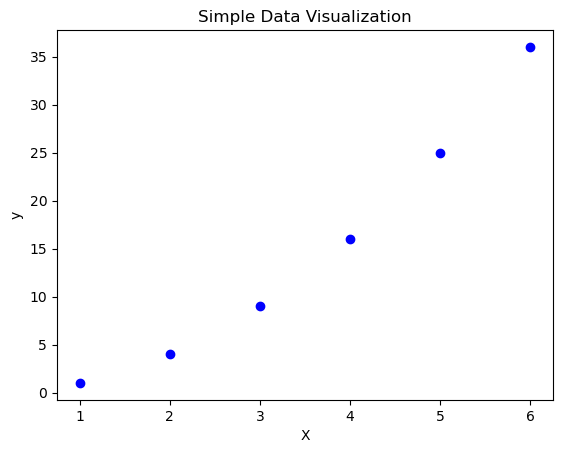

In [9]:
plt.scatter(X,y, color='blue')
plt.title('Simple Data Visualization')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
REGRESSION MODEL DEFINING:

In [10]:
from sklearn.linear_model import LinearRegression

In [12]:
#Basic linear regression model
X_reshaped = X.reshape(-1,1) #X turning into a 2D array
model = LinearRegression()
model.fit(X_reshaped, y)

LinearRegression()

In [13]:
#Slope and intercept for model
print(f"Slope (m) :{model.coef_[0]}")
print(f"Intercept (b) :{model.intercept_}")

Slope (m) :7.000000000000001
Intercept (b) :-9.333333333333337


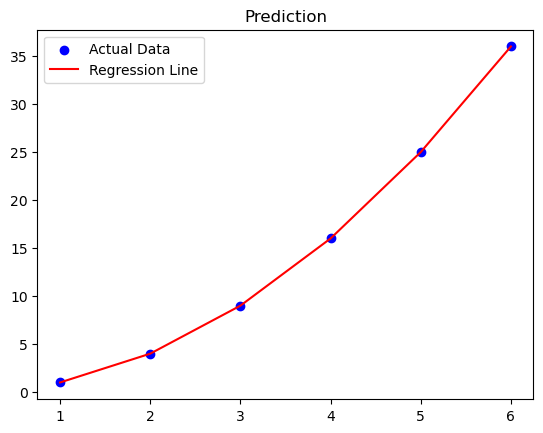

In [17]:
#Let's predict now:
plt.title('Prediction')
y_pred = model.predict(X_reshaped)
plt.scatter(X, y, color = 'blue', label = 'Actual Data')
plt.plot(X,y, color = 'red', label = 'Regression Line')
plt.legend()
plt.show()

In [ ]:
#COST VISUALISATION:

In [20]:
def compute_cost(y, y_pred):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return cost

cost = compute_cost(y, y_pred)
print(f"Cost (MSE): {cost}")

Cost (MSE): 3.111111111111109


In [22]:
#With gradient decent optimising parameters
def gradient_decent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        y_pred = np.dot(X, theta)
        error = y_pred - y
        gradient = (1 / m)  * np.dot(X.T, error)
        theta -= learning_rate * gradient
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_history.append(cost)

    return theta, cost_history

In [23]:
#Data Prep
X = np.c_[np.ones(X_reshaped.shape[0]), X_reshaped]
theta = np.random.randn(2)
learning_rate = 0.01
iterations = 1000

In [29]:
#Start Gradient Decent
theta_optimized, cost_history = gradient_decent(X, y, theta, learning_rate, iterations)

print(f"Optimized Theta: {theta_optimized}")

Optimized Theta: [-7.48744929  6.56883942]


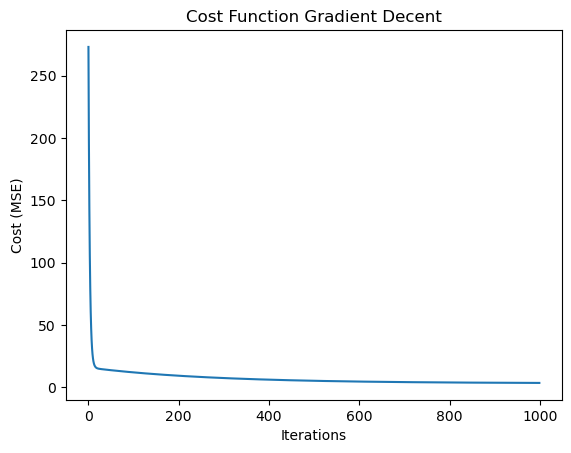

In [31]:
#Cost Function Changing
plt.plot(range(iterations), cost_history)
plt.title("Cost Function Gradient Decent")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.show()

In [32]:
#Optimized with Theta Prediction
y_pred_optimized = np.dot(X, theta_optimized)

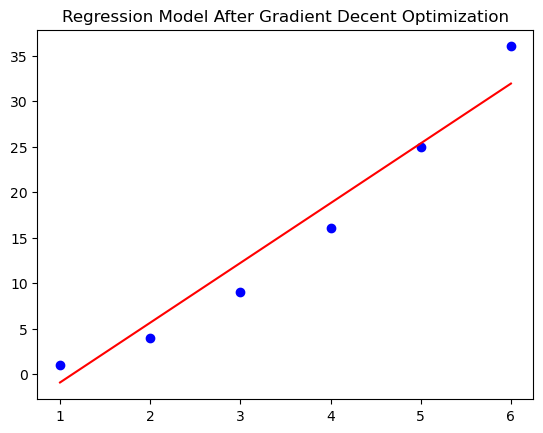

In [36]:
#Visualisation ther results
plt.scatter(X[:,1], y, color = 'blue', label='Actual Data')
plt.plot(X[:,1], y_pred_optimized, color = 'red', label = 'Optimized Regression Line')
plt.title('Regression Model After Gradient Decent Optimization')
plt.show()